In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from arch import arch_model
from scipy.stats import t
from IPython.display import display

In [4]:
#fix random seed for the following
np.random.seed(2025)

Q1

In [5]:
#parameters
n = 1000 #num random draws
num_simulations = 10000 #simulations

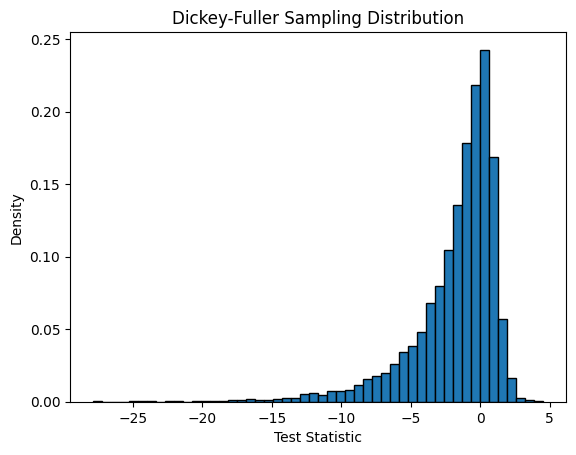

5th percentile: -7.9809


In [6]:
#simulate dickey fuller 10,000 times with 1000 draws each
test_stats = []

#for each of the 10,000 simulations
for _ in range(num_simulations):
    
    ##denominator
    ###draw epsilon
    epsilon = np.random.normal(0, np.sqrt(1 / n), n)

    ###cumulative sum
    W = np.cumsum(epsilon)
    
    ###integral of W^2
    denominator = np.sum(W ** 2) * (1 / n)
    
    ##numerator
    chi_sq = W[-1] ** 2  
    numerator = 0.5 * (chi_sq - 1)
    
    test_stat = numerator / denominator
    test_stats.append(test_stat)

test_stats = np.array(test_stats)

plt.hist(test_stats, bins=50, density=True, edgecolor = 'black')
plt.xlabel("Test Statistic")
plt.ylabel("Density")
plt.title("Dickey-Fuller Sampling Distribution")
plt.show()

percent_5 = np.percentile(test_stats, 5)
print(f"5th percentile: {percent_5:.4f}")

Q2

Q2 (d)

In [7]:
#parameters 1
T1 = 1000  #observations per regression
num_simulations = 1000 #regressions

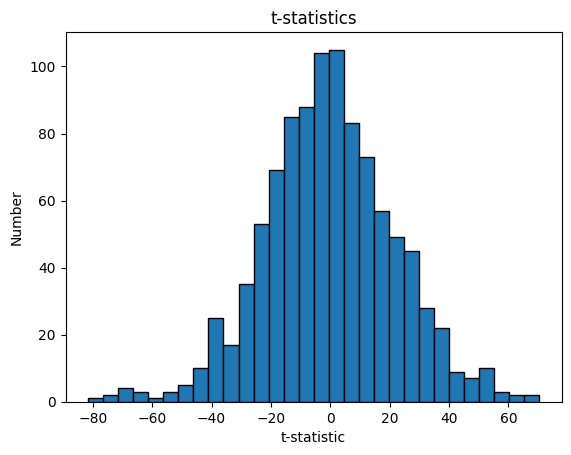

In [8]:
#simulations for model: y_t = alpha + beta * x_t + e_t
t_stats = []
for _ in range(num_simulations):
    epsilon = np.random.normal(0, 1, T1)
    eta = np.random.normal(0, 1, T1)

    y = np.zeros(T1)
    x = np.zeros(T1)

    for t in range(1, T1):
        y[t] = y[t-1] + epsilon[t]
        x[t] = x[t-1] + eta[t]

    X = sm.add_constant(x)  
    model = sm.OLS(y, X).fit()
    
    t_stats.append(model.tvalues[1]) 

plt.hist(t_stats, bins=30, edgecolor='black')
plt.xlabel('t-statistic')
plt.ylabel('Number')
plt.title('t-statistics')
plt.show()

In [9]:
#params 2
T2 = 1000  #observations per regression
num_simulations = 10000 #regressions

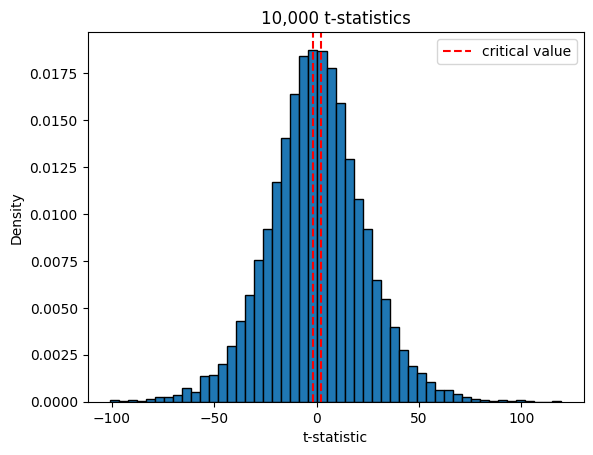

t-statistics significant at 5%: 92.67%


In [10]:
#simulate 1000 observations from above model and plot
t_stats = np.zeros(num_simulations) 

for i in range(num_simulations):
    #build random walks
    epsilon = np.random.normal(0, 1, T2)
    eta = np.random.normal(0, 1, T2)
    y = np.cumsum(epsilon)  
    x = np.cumsum(eta)  

    X = sm.add_constant(x) 
    model = sm.OLS(y, X).fit()
    
    t_stats[i] = model.tvalues[1]

#define significant t-stat as 5%
alpha = 0.05
crit_value = 1.96  
sig_frac = np.mean(np.abs(t_stats) > crit_value)

plt.hist(t_stats, bins=50, edgecolor='black', density=True)
plt.axvline(-crit_value, color='red', linestyle='dashed', label='critical value')
plt.axvline(crit_value, color='red', linestyle='dashed')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.title('10,000 t-statistics')
plt.legend()
plt.show()

print(f"t-statistics significant at 5%: {sig_frac:.2%}")

Q1 (e)

In [11]:
#parameters
T3 = 10000  #observations per regression
num_simulations = 10000  #simulations

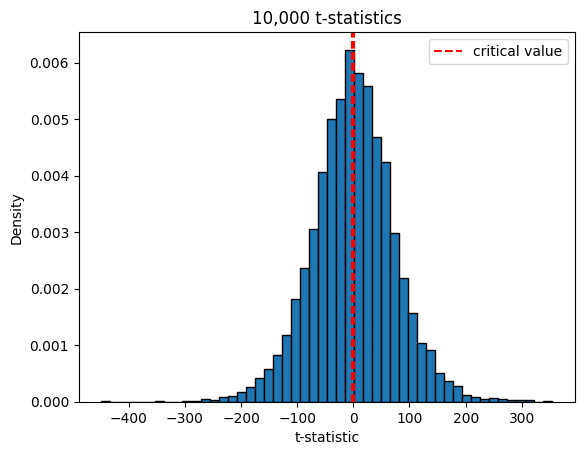

t-statistics significant at 5% level: 97.43%


In [12]:
#repeat earlier but use 10000 obs per regression
t_stats = np.zeros(num_simulations) 

for i in range(num_simulations):
    epsilon = np.random.normal(0, 1, T3)
    eta = np.random.normal(0, 1, T3)
    y = np.cumsum(epsilon)  
    x = np.cumsum(eta)  

    X = sm.add_constant(x) 
    model = sm.OLS(y, X).fit()
    t_stats[i] = model.tvalues[1] 

alpha = 0.05
crit_value = 1.96 
sig_frac = np.mean(np.abs(t_stats) > crit_value)

plt.hist(t_stats, bins=50, edgecolor='black', density=True)
plt.axvline(-crit_value, color='red', linestyle='dashed', label='critical value')
plt.axvline(crit_value, color='red', linestyle='dashed')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.title('10,000 t-statistics')
plt.legend()
plt.show()
print(f"t-statistics significant at 5% level: {sig_frac:.2%}")

We see that even more of the t statistics are significant as we increase the number of observations per regression to 10000

Q3

In [13]:
#import dataset
qqq_dfpath = '/Users/markoshea/Desktop/Working Directories/Datasets/qqq-2.csv'
qqq_df = pd.read_csv(qqq_dfpath) 

sp500_dfpath = '/Users/markoshea/Desktop/Working Directories/Datasets/sp500.csv'
sp500_df = pd.read_csv(sp500_dfpath) 

In [14]:
qqq_df

,date,TICKER,PRC
0,1/3/2000,QQQ,189.50000
1,1/4/2000,QQQ,176.01563
2,1/5/2000,QQQ,172.37500
3,1/6/2000,QQQ,161.50000
4,1/7/2000,QQQ,177.00000
...,...,...,...
6284,12/24/2024,QQQ,529.96002
6285,12/26/2024,QQQ,529.59998
6286,12/27/2024,QQQ,522.56000
6287,12/30/2024,QQQ,515.60999


In [15]:
sp500_df

,caldt,spindx
0,1/3/2000,1455.22
1,1/4/2000,1399.42
2,1/5/2000,1402.11
3,1/6/2000,1403.45
4,1/7/2000,1441.47
...,...,...
6284,12/24/2024,6040.04
6285,12/26/2024,6037.59
6286,12/27/2024,5970.84
6287,12/30/2024,5906.94


In [16]:
#convert to datetime
qqq_df['Date'] = pd.to_datetime(qqq_df['date'])
sp500_df['Date'] = pd.to_datetime(sp500_df['caldt'])

#merge on date col
merged_df = pd.merge(sp500_df, qqq_df, on='Date', suffixes=('_sp500', '_qqq'))
merged_df = merged_df.sort_values(by='Date')

In [17]:
merged_df

,caldt,spindx,Date,date,TICKER,PRC
0,1/3/2000,1455.22,2000-01-03,1/3/2000,QQQ,189.50000
1,1/4/2000,1399.42,2000-01-04,1/4/2000,QQQ,176.01563
2,1/5/2000,1402.11,2000-01-05,1/5/2000,QQQ,172.37500
3,1/6/2000,1403.45,2000-01-06,1/6/2000,QQQ,161.50000
4,1/7/2000,1441.47,2000-01-07,1/7/2000,QQQ,177.00000
...,...,...,...,...,...,...
6284,12/24/2024,6040.04,2024-12-24,12/24/2024,QQQ,529.96002
6285,12/26/2024,6037.59,2024-12-26,12/26/2024,QQQ,529.59998
6286,12/27/2024,5970.84,2024-12-27,12/27/2024,QQQ,522.56000
6287,12/30/2024,5906.94,2024-12-30,12/30/2024,QQQ,515.60999


In [18]:
#prep variables
merged_df['ln_sp500'] = np.log(merged_df['spindx'])
merged_df['ln_qqq'] = np.log(merged_df['PRC'])

merged_df['ln_qqq_lag1'] = merged_df['ln_qqq'].shift(1)

regression_df = merged_df.dropna()

In [19]:
regression_df

,caldt,spindx,Date,date,TICKER,PRC,ln_sp500,ln_qqq,ln_qqq_lag1
1,1/4/2000,1399.42,2000-01-04,1/4/2000,QQQ,176.01563,7.243813,5.170573,5.244389
2,1/5/2000,1402.11,2000-01-05,1/5/2000,QQQ,172.37500,7.245734,5.149672,5.170573
3,1/6/2000,1403.45,2000-01-06,1/6/2000,QQQ,161.50000,7.246689,5.084505,5.149672
4,1/7/2000,1441.47,2000-01-07,1/7/2000,QQQ,177.00000,7.273419,5.176150,5.084505
5,1/10/2000,1457.60,2000-01-10,1/10/2000,QQQ,184.50000,7.284547,5.217649,5.176150
...,...,...,...,...,...,...,...,...,...
6284,12/24/2024,6040.04,2024-12-24,12/24/2024,QQQ,529.96002,8.706166,6.272802,6.259333
6285,12/26/2024,6037.59,2024-12-26,12/26/2024,QQQ,529.59998,8.705760,6.272122,6.272802
6286,12/27/2024,5970.84,2024-12-27,12/27/2024,QQQ,522.56000,8.694643,6.258740,6.272122
6287,12/30/2024,5906.94,2024-12-30,12/30/2024,QQQ,515.60999,8.683883,6.245351,6.258740


In [20]:
#clean up cols
regression_df = regression_df[['Date', 'ln_qqq', 'ln_sp500', 'ln_qqq_lag1']]
regression_df

,Date,ln_qqq,ln_sp500,ln_qqq_lag1
1,2000-01-04,5.170573,7.243813,5.244389
2,2000-01-05,5.149672,7.245734,5.170573
3,2000-01-06,5.084505,7.246689,5.149672
4,2000-01-07,5.176150,7.273419,5.084505
5,2000-01-10,5.217649,7.284547,5.176150
...,...,...,...,...
6284,2024-12-24,6.272802,8.706166,6.259333
6285,2024-12-26,6.272122,8.705760,6.272802
6286,2024-12-27,6.258740,8.694643,6.272122
6287,2024-12-30,6.245351,8.683883,6.258740


In [21]:
#regress ln(sp500_t) on ln(nasdaq_t-1)
X = regression_df['ln_qqq_lag1']
y = regression_df['ln_sp500']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_sp500   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.349e+05
Date:                Fri, 07 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:22   Log-Likelihood:                 4921.2
No. Observations:                6288   AIC:                            -9838.
Df Residuals:                    6286   BIC:                            -9825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8291      0.007    650.266      

In [22]:
#get gamma and stat
gamma_hat = model.params['ln_qqq_lag1']
t_stat_gamma = model.tvalues['ln_qqq_lag1']

print(f"Estimate for gamma: {gamma_hat:.4f}")
print(f"t-stat: {t_stat_gamma:.4f}")

Estimate for gamma: 0.5982
t-stat: 367.2866


Q3 (a)
We determine that the coefficient is 0.5982 with a t-statistic of 367.38. T22hus, the results are statistically significant. However, this is a spurious regression, meaning that although we find a statistically significant relationship, the true relationship between these variables is not as strong. 

In [23]:
#take observations 0-1000 and rerun regression to get new gamma estimate
from scipy.stats import t ##reload t here

regression_df_1000 = regression_df.iloc[:1000]

X_1000 = regression_df_1000['ln_qqq_lag1']
y_1000 = regression_df_1000['ln_sp500']

X_1000 = sm.add_constant(X_1000)
model_1000 = sm.OLS(y_1000, X_1000).fit()

gamma_hat = model_1000.params['ln_qqq_lag1']
se_gamma = model_1000.bse['ln_qqq_lag1']

df_residual = model_1000.df_resid  #df for t-distribution
t_crit = t.ppf(0.975, df_residual)  #use two-tailed 95%

conf_lower = gamma_hat - t_crit * se_gamma
conf_upper = gamma_hat + t_crit * se_gamma

print(f"Estimate of gamma: {gamma_hat:.4f}")
print(f"95% CI for gamma: ({conf_lower:.4f}, {conf_upper:.4f})")

Estimate of gamma: 0.2836
95% CI for gamma: (0.2750, 0.2922)


In [24]:
#split data at these values
windows = {
    "1000-2000": regression_df.iloc[1000:2000],
    "2000-3000": regression_df.iloc[2000:3000],
    "3000-4000": regression_df.iloc[3000:4000],
    "4000-end": regression_df.iloc[4000:]
}

In [25]:
#split data into observations 1000-2000, 2000-3000, 3000-4000, 4000 onwards and repeat above analysis
def run_regression(sub_df):
    X = sub_df['ln_qqq_lag1']
    y = sub_df['ln_sp500']
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    gamma_hat = model.params['ln_qqq_lag1']
    se_gamma = model.bse['ln_qqq_lag1']

    df_residual = model.df_resid  
    t_critical = t.ppf(0.975, df_residual) 

    conf_lower = gamma_hat - t_critical * se_gamma
    conf_upper = gamma_hat + t_critical * se_gamma

    return gamma_hat, conf_lower, conf_upper

results = {}
for key, sub_df in windows.items():
    if len(sub_df) > 0:
        gamma_hat, conf_lower, conf_upper = run_regression(sub_df)
        results[key] = (gamma_hat, conf_lower, conf_upper)

for key, (gamma, lower, upper) in results.items():
    print(f"Observations {key}:")
    print(f"Estimate of gamma: {gamma:.4f}")
    print(f"95% CI: ({lower:.4f}, {upper:.4f})")

Observations 1000-2000:
Estimate of gamma: 0.8608
95% CI: (0.8412, 0.8804)
Observations 2000-3000:
Estimate of gamma: 0.6738
95% CI: (0.6494, 0.6982)
Observations 3000-4000:
Estimate of gamma: 0.7728
95% CI: (0.7630, 0.7826)
Observations 4000-end:
Estimate of gamma: 0.6448
95% CI: (0.6412, 0.6484)


Q3 (c)
We observe that these estimates have some consistency in that they are within [0.5, 1], but only two of the intervals actually overlap, so there is arguably a significant discrepancy.

Q4

In [26]:
#parameters
T4 = 100  #num of observations
coef = 0.99  
sigma_y = 1  #var of epsilon
sigma_x = 1  #var of eta

In [27]:
#simulate 100 observations from models
epsilon = np.random.normal(0, sigma_y, T4)
eta = np.random.normal(0, sigma_x, T4)

y = np.zeros(T4)
x = np.zeros(T4)

for t in range(1, T4):
    y[t] = coef * y[t-1] + epsilon[t]
    x[t] = coef * x[t-1] + eta[t]

X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
gamma_hat = model.params[1] 

print(f"Gamma hat: {gamma_hat:.4f}")
print(model.summary())

Gamma hat: -0.4899
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     23.92
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.94e-06
Time:                        17:18:22   Log-Likelihood:                -269.89
No. Observations:                 100   AIC:                             543.8
Df Residuals:                      98   BIC:                             549.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7240      0.368 

Q4 (a)

See attached notes.

In [28]:
#params
num_sim = 10000  #num of simulations

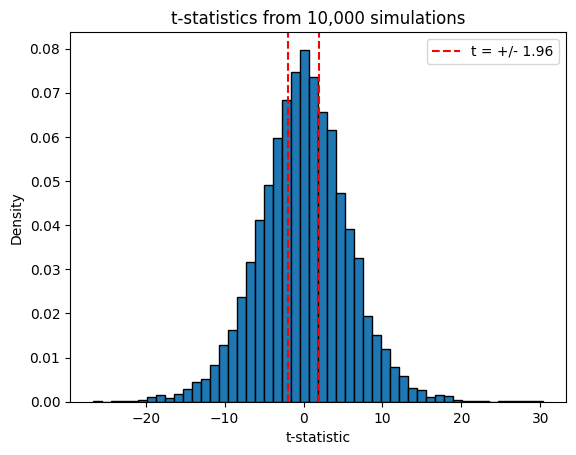

significant t-stats at 5% level: 0.7053


In [29]:
#repeat above simulation 10000 times (100 observations each)
t_stats = []  

for _ in range(num_sim):
    epsilon = np.random.normal(0, np.sqrt(sigma_y), T4)
    eta = np.random.normal(0, np.sqrt(sigma_x), T4)

    y = np.zeros(T4)
    x = np.zeros(T4)

    for t in range(1, T4):
        y[t] = coef * y[t-1] + epsilon[t]
        x[t] = coef * x[t-1] + eta[t]

    X = sm.add_constant(x) 
    model = sm.OLS(y, X).fit()

    t_stats.append(model.tvalues[1])  
t_stats = np.array(t_stats)

plt.hist(t_stats, bins=50, edgecolor='black', density=True)
plt.axvline(x=1.96, color='red', linestyle='dashed', label='t = +/- 1.96')
plt.axvline(x=-1.96, color='red', linestyle='dashed')
plt.xlabel("t-statistic")
plt.ylabel("Density")
plt.title("t-statistics from 10,000 simulations")
plt.legend()
plt.show()

sig_frac = np.mean(np.abs(t_stats) > 1.96)
print(f"significant t-stats at 5% level: {sig_frac:.4f}")

Q4 (b)
We find that over 70% of the t-stats are significant, which is far above the expectation of 5%. T22hus, we find the spurious correlation to be significant here